# LSTM-2

* `max` normalization
* all feature vectors are considered

In [1]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import random
import pandas as pd
import keras
from keras import layers
import utils as ut
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = ut.data2()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)
fv:1, max:34245
fv:2, max:57422
fv:3, max:279251095
fv:4, max:144920186679
fv:5, max:13955
fv:6, max:920
fv:7, max:6228
fv:8, max:534856
fv:9, max:1380.0
SUCCESS


In [3]:
dg = df.sample(100)

fc = [str(e) for e in range(1,10)]
dx = dg[fc]
x = dx.to_numpy()

dy = dg[['e']]
y = dy.to_numpy()

dy = pd.get_dummies(dg['e'],prefix='e')
y = dy.to_numpy()

In [4]:
x.shape, y.shape

((100, 9), (100, 2))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [6]:
X_train.shape, y_train.shape

((67, 9), (67, 2))

In [7]:
X_test.shape, y_test.shape

((33, 9), (33, 2))

In [8]:
class M1:
    
    def __init__(self, n_input, n_units, n_output): 
        
        self.n_input = n_input
        self.n_units = n_units
        self.n_output = n_output
        self.comment = None

    def setcomment(self, msg):
        
        self.comment = msg
        
    def setmodel(self):

        model = Sequential()
        inputs = Input(shape=(1,n_input))
        model.add(inputs)

        lstm = LSTM(self.n_units, return_sequences=True, name="l1")
        model.add(lstm)

        lstm = LSTM(5, return_sequences=True, name="l2")
        model.add(lstm)

        dense = Dense(10, name="l3")
        model.add(dense)

        dense = Dense(self.n_output, activation='softmax', name="l4")
        model.add(dense)

        return model

In [9]:
n_input = 9
n_output = 2
n_units = 9

m = M1(n_input, n_units, n_output)
mm = m.setmodel()
#mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

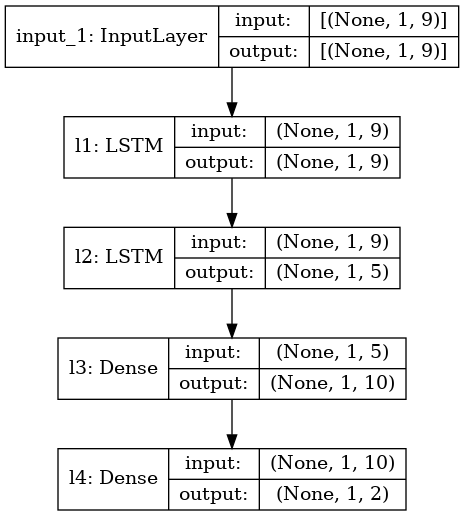

In [10]:
ut.fpm(mm)

In [11]:
xr = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
yr = y_train.reshape((y_train.shape[0], 1, 2))

In [12]:
xr.shape, yr.shape

((67, 1, 9), (67, 1, 2))

In [13]:
hist = mm.fit(xr, yr, epochs=100, batch_size=5, verbose=1,)

Epoch 1/100
14/14 [==============================] - 7s 6ms/step - loss: 0.6787 - accuracy: 0.7463
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6369 - accuracy: 0.8507
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5959 - accuracy: 0.8507
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5583 - accuracy: 0.8507
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.8507
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.8507
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4678 - accuracy: 0.8507
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4456 - accuracy: 0.8507
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4390 - accuracy: 0.8507
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 0.8507
Epoch 11/

14/14 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8507
Epoch 84/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.8507
Epoch 85/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8507
Epoch 86/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3921 - accuracy: 0.8507
Epoch 87/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3911 - accuracy: 0.8507
Epoch 88/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3903 - accuracy: 0.8507
Epoch 89/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8507
Epoch 90/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3918 - accuracy: 0.8507
Epoch 91/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3885 - accuracy: 0.8507
Epoch 92/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3888 - accuracy: 0.8507
Epoch 93/100


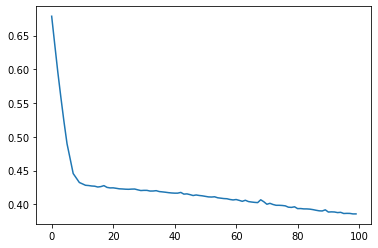

In [14]:
plt.plot(hist.history['loss'])

In [15]:
y_test[:,0]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [16]:
y_test[:,1]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
xr = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
yp = mm.predict(xr)

In [18]:
yp;

In [19]:
yp[:,0,1]

array([0.27118495, 0.049715  , 0.18600088, 0.18577562, 0.11556624,
       0.18548012, 0.27320343, 0.18672296, 0.2740674 , 0.04561833,
       0.27674955, 0.07339158, 0.21590526, 0.04242418, 0.18132906,
       0.17966956, 0.18025008, 0.12623663, 0.26035792, 0.2849062 ,
       0.18199573, 0.18044966, 0.22931087, 0.12682882, 0.04651948,
       0.2602495 , 0.17816311, 0.04157271, 0.18020408, 0.08848585,
       0.27561253, 0.2752989 , 0.10642625], dtype=float32)

In [20]:
yp[:,0,0]

array([0.728815  , 0.9502851 , 0.8139992 , 0.8142244 , 0.88443375,
       0.8145198 , 0.7267966 , 0.81327707, 0.72593254, 0.95438164,
       0.72325045, 0.9266084 , 0.78409475, 0.9575758 , 0.818671  ,
       0.82033044, 0.81974995, 0.8737634 , 0.7396421 , 0.7150938 ,
       0.8180043 , 0.81955034, 0.7706892 , 0.8731712 , 0.9534805 ,
       0.7397505 , 0.8218369 , 0.9584273 , 0.81979597, 0.9115141 ,
       0.72438747, 0.7247011 , 0.89357376], dtype=float32)

In [21]:
yp[:,0,1]

array([0.27118495, 0.049715  , 0.18600088, 0.18577562, 0.11556624,
       0.18548012, 0.27320343, 0.18672296, 0.2740674 , 0.04561833,
       0.27674955, 0.07339158, 0.21590526, 0.04242418, 0.18132906,
       0.17966956, 0.18025008, 0.12623663, 0.26035792, 0.2849062 ,
       0.18199573, 0.18044966, 0.22931087, 0.12682882, 0.04651948,
       0.2602495 , 0.17816311, 0.04157271, 0.18020408, 0.08848585,
       0.27561253, 0.2752989 , 0.10642625], dtype=float32)

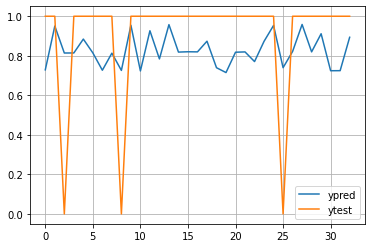

In [30]:
ll = []
plt.plot(yp[:,0,0], markersize=20)
ll.append('ypred')
plt.plot(y_test[:,0], markersize=20)
ll.append('ytest')
plt.legend(ll)
plt.grid()

In [23]:
dr = pd.DataFrame({'1p':yp[:,0,0], '1t':y_test[:,0], 
                  '0p':yp[:,0,1], '0t':y_test[:,1],})

array([[<AxesSubplot:title={'center':'0p'}>,
        <AxesSubplot:title={'center':'0t'}>]], dtype=object)

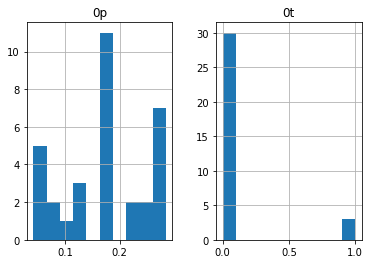

In [24]:
dr[['0p','0t']].hist()

array([[<AxesSubplot:title={'center':'1p'}>,
        <AxesSubplot:title={'center':'1t'}>]], dtype=object)

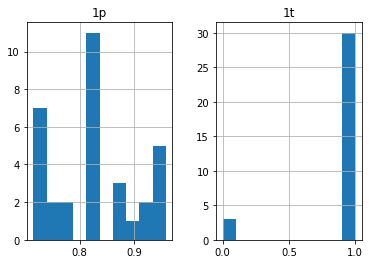

In [25]:
dr[['1p','1t']].hist()

In [26]:
def gn(x):
    if x > 0.02 :
        return 0
    return -1


def fn(x):
    if x > 0.9 :
        return 1
    return -1

In [27]:
dr['1pp'] = dr['1p'].apply(fn)
dr['0pp'] = dr['0p'].apply(gn)

In [28]:
dr

1p  1t        0p  0t  1pp  0pp
0   0.728815   1  0.271185   0   -1    0
1   0.950285   1  0.049715   0    1    0
2   0.813999   0  0.186001   1   -1    0
3   0.814224   1  0.185776   0   -1    0
4   0.884434   1  0.115566   0   -1    0
5   0.814520   1  0.185480   0   -1    0
6   0.726797   1  0.273203   0   -1    0
7   0.813277   1  0.186723   0   -1    0
8   0.725933   0  0.274067   1   -1    0
9   0.954382   1  0.045618   0    1    0
10  0.723250   1  0.276750   0   -1    0
11  0.926608   1  0.073392   0    1    0
12  0.784095   1  0.215905   0   -1    0
13  0.957576   1  0.042424   0    1    0
14  0.818671   1  0.181329   0   -1    0
15  0.820330   1  0.179670   0   -1    0
16  0.819750   1  0.180250   0   -1    0
17  0.873763   1  0.126237   0   -1    0
18  0.739642   1  0.260358   0   -1    0
19  0.715094   1  0.284906   0   -1    0
20  0.818004   1  0.181996   0   -1    0
21  0.819550   1  0.180450   0   -1    0
22  0.770689   1  0.229311   0   -1    0
23  0.873171   1  0.126829   0   -1    0
24  0.953480   1  0.046519   0    1    0
25  0.739751   0  0.260249   1   -1    0
26  0.821837   1  0.178163   0   -1    0
27  0.958427   1  0.041573   0    1    0
28  0.819796   1  0.180204   0   -1    0
29  0.911514   1  0.088486   0    1    0
30  0.724387   1  0.275613   0   -1    0
31  0.724701   1  0.275299   0   -1    0
32  0.893574   1  0.106426   0   -1    0